In [1]:
#import time
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
#import seaborn as sns

# 
url = 'https://raw.githubusercontent.com/DeepLabCut/DeepLabCut/master/examples/openfield-Pranav-2018-10-30/labeled-data/m4s1/CollectedData_Pranav.csv'
df = pd.read_csv(url)

## Tip 1 --- make the function to read the data
The data:
**scorer**,Pranav,Pranav,Pranav,Pranav,Pranav,Pranav,Pranav,Pranav
**bodyparts**,snout,snout,leftear,leftear,rightear,rightear,tailbase,tailbase
**coords**,x,y,x,y,x,y,x,y
labeled-data/m4s1/img0000.png,21.521,265.428,33.819,265.941,19.984,250.05599999999998,87.11,152.69799999999998
labeled-data/m4s1/img0001.png,10.248,288.487,19.984,297.198,12.298,281.313,95.821,221.361
....


Now you are using the single animal dataset, so the dataframe contains multi index with the **'scorer', 'bodyparts', 'coords'**, --> which can be obtained from the **config.yaml** under the project. When you use multi-animal project someday, the multi indexes are **'scorer', 'individuals', 'bodyparts', 'coords'**.

What you have to check is the file -- **config.yaml**, you can read the info by: deeplabcut.auxiliaryfunctions.read_config(config_file)
https://github.com/DeepLabCut/DeepLabCut/blob/master/deeplabcut/utils/auxiliaryfunctions.py#L161


So it's better to make a function which can be applied to all the dataset we have.

For single animal project you can follow the script to read the data, like this:

In [13]:
### Tips:
header = [0, 1, 2] ### if multi-animal project, header = [0, 1, 2, 3]

df = pd.read_csv(url, header=header, index_col=0)
df

scorer                         Pranav                                     \
bodyparts                       snout          leftear          rightear   
coords                              x        y       x        y        x   
labeled-data/m4s1/img0000.png  21.521  265.428  33.819  265.941   19.984   
labeled-data/m4s1/img0001.png  10.248  288.487  19.984  297.198   12.298   
labeled-data/m4s1/img0002.png  24.596  354.075  38.431  354.075   23.058   
labeled-data/m4s1/img0003.png  73.787  374.572  78.911  366.373   57.390   
labeled-data/m4s1/img0004.png  38.431  333.066  50.729  341.777   39.968   
...                               ...      ...     ...      ...      ...   
labeled-data/m4s1/img0111.png  30.745   65.588  35.356   79.424   42.530   
labeled-data/m4s1/img0112.png  29.207  104.532  36.894  109.143   36.894   
labeled-data/m4s1/img0113.png  30.232  188.567  39.968  181.393   27.670   
labeled-data/m4s1/img0114.png  26.645  262.354  38.431  262.354   24.596   
labeled-data/m4s1/img0115.png  65.588  321.281  72.250  312.058   52.778   

scorer                                                    
bodyparts                              tailbase           
coords                               y        x        y  
labeled-data/m4s1/img0000.png  250.056   87.110  152.698  
labeled-data/m4s1/img0001.png  281.313   95.821  221.361  
labeled-data/m4s1/img0002.png  337.166   99.408  256.205  
labeled-data/m4s1/img0003.png  361.761  106.581  270.040  
labeled-data/m4s1/img0004.png  323.331  131.177  273.627  
...                                ...      ...      ...  
labeled-data/m4s1/img0111.png   60.977  138.863   97.870  
labeled-data/m4s1/img0112.png   89.672  143.987   89.159  
labeled-data/m4s1/img0113.png  167.046  112.218   96.845  
labeled-data/m4s1/img0114.png  248.519   84.548  155.773  
labeled-data/m4s1/img0115.png  306.934   92.746  192.154  

[116 rows x 8 columns]

In [12]:
#### you can read the data by the image_name / and by bodyparts
filenames = df.index
scorer = 'Pranav'
bodypart = 'snout'
print('filename lists:', filenames)
print()
print('data for [filenames[0]', df.loc[filenames[0]])
print()
print('x_snout:', df.loc[filenames[0]][(scorer, bodypart, 'x')])


### then you can make the fake data with different bodypart
### TODO...

filename lists: Index(['labeled-data/m4s1/img0000.png', 'labeled-data/m4s1/img0001.png',
       'labeled-data/m4s1/img0002.png', 'labeled-data/m4s1/img0003.png',
       'labeled-data/m4s1/img0004.png', 'labeled-data/m4s1/img0005.png',
       'labeled-data/m4s1/img0006.png', 'labeled-data/m4s1/img0007.png',
       'labeled-data/m4s1/img0008.png', 'labeled-data/m4s1/img0009.png',
       ...
       'labeled-data/m4s1/img0106.png', 'labeled-data/m4s1/img0107.png',
       'labeled-data/m4s1/img0108.png', 'labeled-data/m4s1/img0109.png',
       'labeled-data/m4s1/img0110.png', 'labeled-data/m4s1/img0111.png',
       'labeled-data/m4s1/img0112.png', 'labeled-data/m4s1/img0113.png',
       'labeled-data/m4s1/img0114.png', 'labeled-data/m4s1/img0115.png'],
      dtype='object', length=116)

data for [filenames[0] scorer  bodyparts  coords
Pranav  snout      x          21.521
                   y         265.428
        leftear    x          33.819
                   y         265.941
        ri

## Tip 2  --- use the function to make fake data

    What we want to do is to mimic the scenario --- the people made some mistakes during labeling the data in the GUI..
    
1) input the image name / bodypart to update the data \
2) you can add random noise on only 1 or 2 labeled bodyparts \
3) you can swap some bodyparts which have left and right, eg. the ears


## Tip 3 --- still make them functional --- on analysis part, so you can easily to apply to the other dataset, we can try horse-10.

In [50]:
df = df.drop(df.columns[[0]], axis=1)
df.loc[0,:] = df.loc[0,:] + ' ' + df.loc[1,:] 
df = df.drop([1])
df = df.reset_index(drop=True)
df.head()

,Pranav,Pranav.1,Pranav.2,Pranav.3,Pranav.4,Pranav.5,Pranav.6,Pranav.7
0,snout x,snout y,leftear x,leftear y,rightear x,rightear y,tailbase x,tailbase y
1,21.521,265.428,33.819,265.941,19.984,250.05599999999998,87.11,152.69799999999998
2,10.248,288.487,19.984,297.198,12.298,281.313,95.821,221.361
3,24.596,354.075,38.431,354.075,23.058000000000003,337.166,99.40799999999999,256.205
4,73.78699999999999,374.57199999999995,78.911,366.37300000000005,57.39,361.76099999999997,106.581,270.04


In [51]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

df = df.astype(float)
df.head()

,snout x,snout y,leftear x,leftear y,rightear x,rightear y,tailbase x,tailbase y
1,21.521,265.428,33.819,265.941,19.984,250.056,87.110,152.698
2,10.248,288.487,19.984,297.198,12.298,281.313,95.821,221.361
3,24.596,354.075,38.431,354.075,23.058,337.166,99.408,256.205
4,73.787,374.572,78.911,366.373,57.390,361.761,106.581,270.040
5,38.431,333.066,50.729,341.777,39.968,323.331,131.177,273.627


In [56]:
# adding fake data

df_fake = df.copy(deep=True)
df_fake.loc[1:2,'leftear x'] = df.loc[1:2,'rightear x'] + np.mean(df['rightear x'])
df_fake.loc[1:2,'rightear x'] = df.loc[1:2,'leftear x']

df_fake.loc[1:2,'leftear y'] = df.loc[1:2,'rightear y'] + np.mean(df['rightear y'])
df_fake.loc[1:2,'rightear y'] = df.loc[1:2,'leftear y']

df_fake.loc[1:2,'snout x'] = df.loc[1:2,'snout x'] + np.mean(df['snout x'])
df_fake.loc[1:2,'tailbase x'] = df.loc[1:2,'tailbase x'] + np.mean(df['tailbase x'])
df_fake

,snout x,snout y,leftear x,leftear y,rightear x,rightear y,tailbase x,tailbase y
1,78.910922,265.428,81.234681,509.914103,33.819,265.941,231.976224,152.698
2,67.637922,288.487,73.548681,541.171103,19.984,297.198,240.687224,221.361
3,24.596000,354.075,38.431000,354.075000,23.058,337.166,99.408000,256.205
4,73.787000,374.572,78.911000,366.373000,57.390,361.761,106.581000,270.040
5,38.431000,333.066,50.729000,341.777000,39.968,323.331,131.177000,273.627
...,...,...,...,...,...,...,...,...
112,30.745000,65.588,35.356000,79.424000,42.530,60.977,138.863000,97.870
113,29.207000,104.532,36.894000,109.143000,36.894,89.672,143.987000,89.159
114,30.232000,188.567,39.968000,181.393000,27.670,167.046,112.218000,96.845
115,26.645000,262.354,38.431000,262.354000,24.596,248.519,84.548000,155.773


In [57]:
df_fake = df_fake.astype(float)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 1 to 116
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   snout x     116 non-null    float64
 1   snout y     116 non-null    float64
 2   leftear x   116 non-null    float64
 3   leftear y   116 non-null    float64
 4   rightear x  116 non-null    float64
 5   rightear y  116 non-null    float64
 6   tailbase x  116 non-null    float64
 7   tailbase y  116 non-null    float64
dtypes: float64(8)
memory usage: 7.4 KB
None


In [58]:
df_features = pd.DataFrame()

df_features['ears'] = np.sqrt(np.square(df['leftear x'] - df['rightear x'])+np.square(df['leftear y'] - df['rightear y'])) 
df_features['tailbase_snout'] = np.sqrt(np.square(df['snout x'] - df['tailbase x'])+np.square(df['snout y'] - df['tailbase y'])) 

df_features.head()

,ears,tailbase_snout
1,21.065148,130.422275
2,17.646751,108.759543
3,22.852646,123.188361
4,22.009634,109.555399
5,21.355422,110.158137


In [59]:
fake_features = pd.DataFrame()

fake_features['ears'] = np.sqrt(np.square(df_fake['leftear x'] - df_fake['rightear x'])+np.square(df_fake['leftear y'] - df_fake['rightear y'])) 
fake_features['tailbase_snout'] = np.sqrt(np.square(df_fake['snout x'] - df_fake['tailbase x'])+np.square(df_fake['snout y'] - df_fake['tailbase y'])) 

fake_features.head()

,ears,tailbase_snout
1,248.537969,190.097447
2,249.784007,185.612394
3,22.852646,123.188361
4,22.009634,109.555399
5,21.355422,110.158137


In [60]:
print('Size of the dataframe: {}'.format(df_features.shape))

Size of the dataframe: (116, 2)


In [61]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(fake_features) # standart scaler
two_features = pd.DataFrame(x)
two_features.head()

,0,1
0,7.508028,5.970477
1,7.549646,5.591214
2,-0.029907,0.312538
3,-0.058063,-0.840287
4,-0.079914,-0.789319


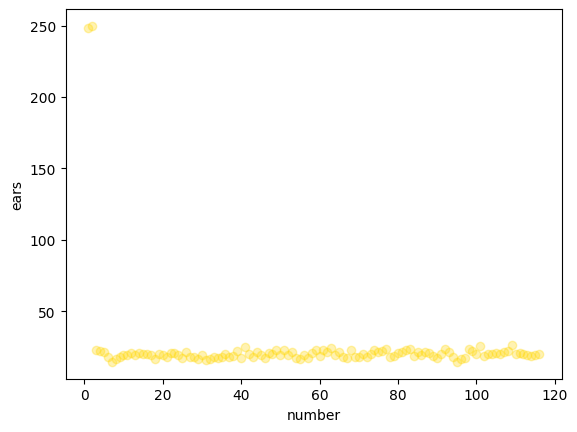

In [62]:
names = list(range(1, fake_features.shape[0]+1))
plt.scatter(names, fake_features['ears'], alpha=.3, color='gold')
plt.xlabel('number')
plt.ylabel('ears')
plt.show()

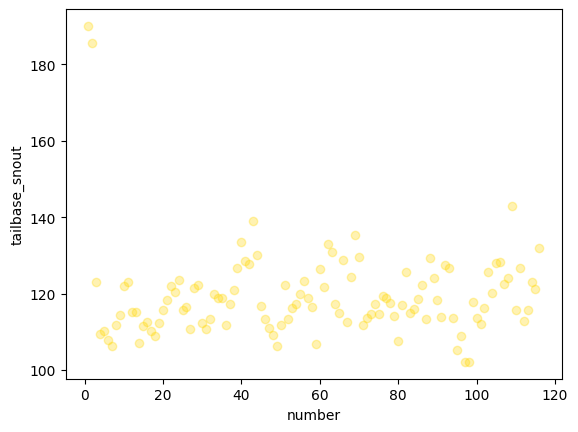

In [63]:
plt.scatter(names, fake_features['tailbase_snout'], alpha=.3, color='gold')
plt.xlabel('number')
plt.ylabel('tailbase_snout')
plt.show()

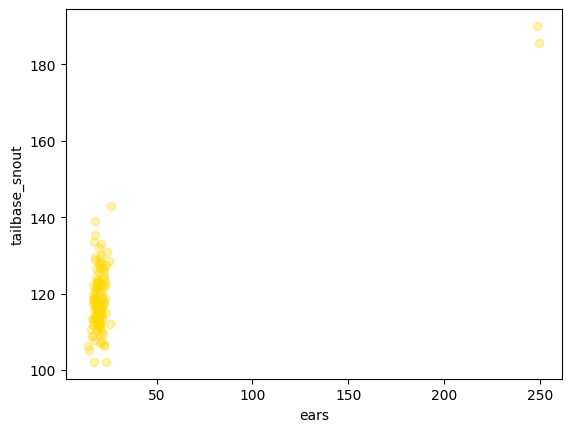

In [64]:
plt.scatter(fake_features['ears'], fake_features['tailbase_snout'], alpha=.3, color='gold')
plt.xlabel('ears')
plt.ylabel('tailbase_snout')
plt.show()

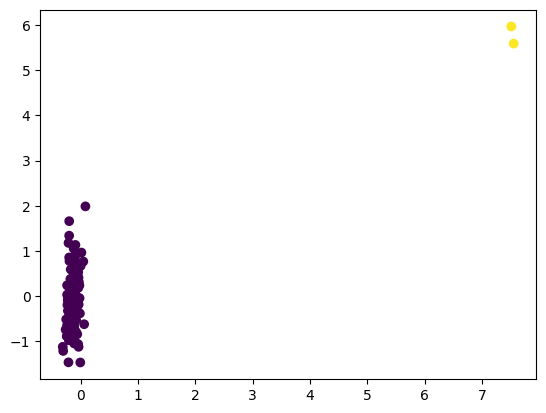

In [65]:
from sklearn.cluster import KMeans # Our clustering algorithm

model = KMeans(n_clusters=2)
model.fit(two_features.iloc[:,:2])

labels = model.predict(two_features.iloc[:,:2])
plt.scatter(two_features[0], two_features[1], c=labels)
plt.show()


In [66]:
from sklearn.manifold import TSNE

tsne = TSNE()
x_tsne = tsne.fit_transform(x)
tsne_components = pd.DataFrame(x_tsne)

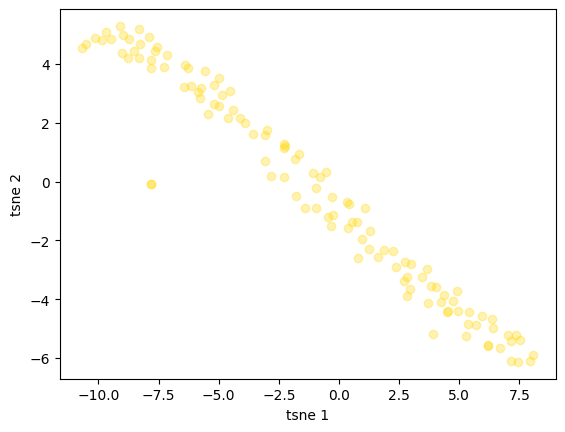

In [67]:
plt.scatter(tsne_components[0], tsne_components[1], alpha=.3, color='gold')
plt.xlabel('tsne 1')
plt.ylabel('tsne 2')
plt.show()

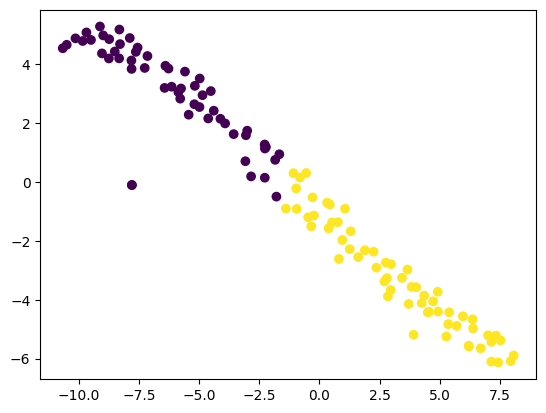

In [68]:
model = KMeans(n_clusters=2)
model.fit(tsne_components.iloc[:,:2])

labels = model.predict(tsne_components.iloc[:,:2])
plt.scatter(tsne_components[0], tsne_components[1], c=labels)
plt.show()


In [69]:
'''
Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

The main concept of DBSCAN algorithm is to locate regions of high density 
that are separated from one another by regions of low density 

'''

'\nDensity-Based Spatial Clustering of Applications with Noise (DBSCAN)\n\nThe main concept of DBSCAN algorithm is to locate regions of high density \nthat are separated from one another by regions of low density \n\n'

In [114]:
from sklearn.cluster import DBSCAN

# min_samples = the minimum number of core points needed in order to form a cluster
# eps = the maximum distance between two samples for them to be considered as in the same cluster

dbscan=DBSCAN(eps = 0.5, min_samples = 3)

# fit - perform DBSCAN clustering from features, or distance matrix.
dbscan = dbscan.fit(two_features)

In [115]:
cluster = dbscan.labels_
len(set(cluster))

2

In [122]:
def show_clusters(X, cluster):
    df = X.loc[:,0:1]
    df.loc[:,'label'] = cluster
    colors = {-1: 'red', 0: 'blue', 1:'orange', 2:'green', 3:'yellow', 4:'black', 5:'gold'}
    fig, ax = plt.subplots(figsize=(8,8))
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x=0, y=1, label=key, color=colors[key])
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    plt.show()
    #, 1:'orange', 2:'green', 3:'yellow'

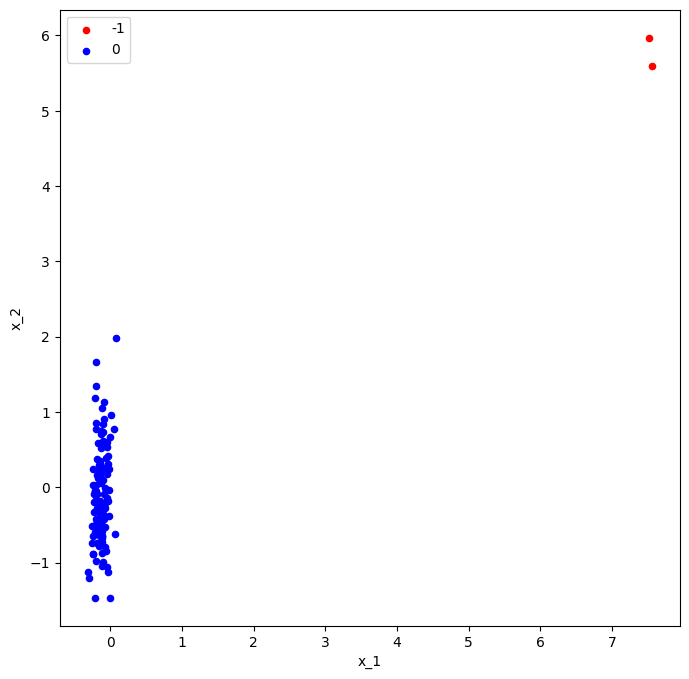

In [123]:
show_clusters(two_features, cluster)

In [121]:
two_features['labels'] = dbscan.labels_
two_features.head()

,0,1,labels
0,7.508028,5.970477,-1
1,7.549646,5.591214,-1
2,-0.029907,0.312538,0
3,-0.058063,-0.840287,0
4,-0.079914,-0.789319,0
